In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling
import datetime
import json
import os
import pprint
import random
import string
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Business Understanding  

Using the data that was provided to us, we are trying to classify the y variable by minimizing the cost function: False Negatives cost \\$500, False Positives cost \\$10, True Positives cost \\$0 and True Negatives cost \\$0. We were given 50 variables and a target variable, and asked to use the variables to model the target variable. Thus, we are not sure why this problem is important, how to interpret the individual variables, and we bring no domain knowledge into this problem. The results below are purely the result of trends that are present in the dataset. 

Our assumptions are that the data, as provided to us, is either the entire population in question, or a random sample taken from the entire population in question. We assume that the cost function provided to us is correct, and that False Negatives truly cost \\$500, False Positives truly cost \\$10, True Positives truly cost \\$0 and True Negatives truly cost \\$0. 

## Data Evaluation / Engineering

Read the data in.

In [2]:
df = pd.read_csv("/home/drew/School/Semester4/QTW/Final_Case_Materials/final_project.csv")
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


**The majority of the data is float64. We will take a deeper look at the variables, starting with the numeric variables.** 

In [3]:
df.dtypes

x0     float64
x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13    float64
x14    float64
x15    float64
x16    float64
x17    float64
x18    float64
x19    float64
x20    float64
x21    float64
x22    float64
x23    float64
x24     object
x25    float64
x26    float64
x27    float64
x28    float64
x29     object
x30     object
x31    float64
x32     object
x33    float64
x34    float64
x35    float64
x36    float64
x37     object
x38    float64
x39    float64
x40    float64
x41    float64
x42    float64
x43    float64
x44    float64
x45    float64
x46    float64
x47    float64
x48    float64
x49    float64
y        int64
dtype: object

**There are between 20 and 50 NA's in each column.**

In [4]:
df.isna().sum()

x0     26
x1     25
x2     38
x3     37
x4     26
x5     37
x6     26
x7     27
x8     21
x9     30
x10    43
x11    30
x12    36
x13    31
x14    34
x15    35
x16    26
x17    27
x18    40
x19    35
x20    38
x21    29
x22    27
x23    47
x24    28
x25    22
x26    36
x27    30
x28    35
x29    30
x30    30
x31    39
x32    31
x33    41
x34    41
x35    30
x36    27
x37    23
x38    31
x39    23
x40    36
x41    40
x42    26
x43    37
x44    40
x45    29
x46    31
x47    37
x48    32
x49    32
y       0
dtype: int64

**If we were to drop all of the NA's, we would lose about 1% of the data. We can proceed with dropping NA's without fear of losing too much data.** 

In [5]:
print('Total Observations',len(df))
print('Number of observations left after removing N/A values',len(df.dropna()))
print('Percentage of data removed',len(df.dropna()) / len(df))

Total Observations 160000
Number of observations left after removing N/A values 158392
Percentage of data removed 0.98995


**Looks like we have a variety of ranges for the rest of our numeric variables. All variables have a minimum in the negatives, while all variables have a maximum in the positives. y is a binary 0 or 1, as expected. It appears that all the numeric variables are cleaned, so we will move onto the 'object' columns.**

In [6]:
df_numeric = df.dropna()
df_numeric = df_numeric.drop(columns = ['x24', 'x29', 'x30', 'x32', 'x37'])
df_numeric.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,...,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000
mean,-0.000808,0.003705,-1.148314,-0.023012,-0.000266,0.013282,-1.669562,-7.697877,-0.028853,0.004320,...,6.706030,-1.832959,-0.002174,-0.007254,0.000996,-12.751993,0.028262,0.000160,-0.672052,0.401195
std,0.371064,6.340297,13.274738,8.066624,6.383306,7.672102,19.300472,30.541562,8.904048,6.354359,...,18.675642,5.110079,1.535282,4.163766,0.396604,36.608634,4.787974,1.935087,15.033134,0.490142
min,-1.592635,-26.278302,-59.394048,-33.864827,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251246,-4.259016,-10.166609,-5.453044,-4.313987,-5.152419,-14.781485,-27.315875,-6.034094,-4.260304,...,-5.802178,-5.159340,-1.039992,-2.814168,-0.266369,-36.432779,-3.216974,-1.320800,-10.929046,0.000000
50%,-0.001818,0.010023,-1.342199,-0.028470,-0.001138,0.015135,-1.951457,-6.959275,-0.016173,0.003098,...,6.847926,-1.922935,-0.004279,-0.012278,0.001841,-12.975088,0.036234,-0.011800,-0.569139,0.000000
75%,0.248622,4.286606,7.878130,5.448332,4.308644,5.191172,11.454209,12.215119,5.978646,4.303807,...,19.269855,1.452018,1.033870,2.781096,0.269194,11.445524,3.269134,1.318161,9.649839,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


**Our target varible 'y' is a collection of 0s and 1s. There is about a 40/60 split in the target variable.**

In [7]:
print(df_numeric['y'].unique())
print(df_numeric['y'].value_counts())
print(df_numeric['y'].value_counts() / df_numeric['y'].count())

[0 1]
0    94846
1    63546
Name: y, dtype: int64
0    0.598805
1    0.401195
Name: y, dtype: float64


**x24 is a column of what looks like continents, between europe, asia, america and nan. This is definitely not a numeric column that is being read in as a string, but we'll want to do some clean up to this column.** 

In [8]:
df['x24'].unique()

array(['euorpe', 'asia', 'america', nan], dtype=object)

**x29 needs to be cleaned. It is a column of months, where most months are 3 letters, but some are longer.**

In [9]:
df['x29'].unique()

array(['July', 'Aug', 'Jun', 'May', 'sept.', 'Apr', 'Nov', 'Oct', nan,
       'Mar', 'Feb', 'Dev', 'January'], dtype=object)

**x30 is a column of weekdays, monday through friday. Some days are misspelled. This column needs some cleaning.**

In [10]:
df['x30'].unique()

array(['tuesday', 'wednesday', 'thurday', 'monday', 'friday', nan],
      dtype=object)

**x32 is a column of percents that is being read in as str instead of numeric. This needs to be cleaned and turned into a numeric variable.**

In [11]:
df['x32'].unique()

array(['0.0%', '-0.02%', '-0.01%', '0.01%', '-0.03%', '0.02%', '-0.0%',
       '-0.04%', nan, '0.03%', '0.04%', '-0.05%', '0.05%'], dtype=object)

**x37 is a row of dollar values that were read in as str instead of numeric. This variable needs to be cleaned and turned into a numeric variable.** 

In [12]:
df['x37'].unique()

array(['$1313.96', '$1962.78', '$430.47', ..., '$1588.65', '$439.21',
       '$-1229.34'], dtype=object)

**Aside from dropping the NA's, it doesn't look like we need to do much cleaning with the variables that are already numeric. Thus, cleaning will focus on 'x24', 'x29', 'x30', 'x32' and 'x37'. First, we drop NA's.**

In [13]:
df_na = df.dropna()

**x24 has 'euorpe', 'asia' and 'america' as possible values. We will fix the spelling of europe and capitalize the first letter of each continent name.** 

In [14]:
df_na['x24'].unique()

array(['euorpe', 'asia', 'america'], dtype=object)

In [15]:
df_na['x24'] = df_na['x24'].str.replace('euorpe', 'Europe')
df_na['x24'] = df_na['x24'].str.replace('asia', 'Asia')
df_na['x24'] = df_na['x24'].str.replace('america', 'America')
df_na['x24'].unique()

array(['Europe', 'Asia', 'America'], dtype=object)

**We move on to the 'x29' variable, which has months in various forms. We will stick with the 3 letter form of each month, since most months are spelled that way. That means 'July', 'sept.', 'Dec' and 'January' need to be fixed.**

In [16]:
df_na['x29'].unique()

array(['July', 'Aug', 'Jun', 'May', 'sept.', 'Apr', 'Nov', 'Oct', 'Mar',
       'Feb', 'Dev', 'January'], dtype=object)

In [17]:
df_na['x29'] = df_na['x29'].str.replace('July', 'Jul')
df_na['x29'] = df_na['x29'].str.replace('sept.', 'Sep')
df_na['x29'] = df_na['x29'].str.replace('Dev', 'Dec')
df_na['x29'] = df_na['x29'].str.replace('January', 'Jan')
df_na['x29'].unique()

array(['Jul', 'Aug', 'Jun', 'May', 'Sep', 'Apr', 'Nov', 'Oct', 'Mar',
       'Feb', 'Dec', 'Jan'], dtype=object)

**Here, we look at the x30 variable, which seems to be days of the week. We'll capitalize like we had with the continents, and fix the spelling of 'thurday'.**

In [18]:
df_na['x30'].unique()

array(['tuesday', 'wednesday', 'thurday', 'monday', 'friday'],
      dtype=object)

In [19]:
df_na['x30'] = df_na['x30'].str.replace('tuesday', 'Tuesday')
df_na['x30'] = df_na['x30'].str.replace('wednesday', 'Wednesday')
df_na['x30'] = df_na['x30'].str.replace('thurday', 'Thursday')
df_na['x30'] = df_na['x30'].str.replace('monday', 'Monday')
df_na['x30'] = df_na['x30'].str.replace('friday', 'Friday')
df_na['x30'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Monday', 'Friday'],
      dtype=object)

**Here, we investigate the 'x32' variable. These are percents that still have % at the end, so pandas interprets them as strings. We will remove the % at the end, convert to numeric, and divide each value by 100 to convert percent to decimal. Note that the result only has 11 unique values instead of 12, as -0.0% and 0.0% were interpreted as two different values initially.**

In [20]:
df_na['x32'].unique()

array(['0.0%', '-0.02%', '-0.01%', '0.01%', '-0.03%', '0.02%', '-0.0%',
       '-0.04%', '0.03%', '0.04%', '-0.05%', '0.05%'], dtype=object)

In [21]:
df_na['x32'] = df_na['x32'].str.replace('%', '')
df_na['x32'] = df_na['x32'].astype('float64')
df_na['x32'] = df_na['x32'] / 100
df_na['x32'].unique()

array([ 0.    , -0.0002, -0.0001,  0.0001, -0.0003,  0.0002, -0.0004,
        0.0003,  0.0004, -0.0005,  0.0005])

**Finally, we have x37. This variable was interpreted as a string due to the leading dollar sign. We will remove this dollar sign and convert the result to numeric.** 

In [22]:
df_na['x37'].unique()

array(['$1313.96', '$1962.78', '$430.47', ..., '$1588.65', '$439.21',
       '$-1229.34'], dtype=object)

In [23]:
df_na['x37'] = df_na['x37'].str.replace('$', '').astype('float64').round(2)
df_na['x37'].unique()

array([ 1313.96,  1962.78,   430.47, ...,  1588.65,   439.21, -1229.34])

In [24]:
df_clean = df_na

**We have no NA's in our df_clean, and our variables are all numeric other than x24, x29 and x30, which is expected. We are ready to move forward with EDA and modelling.**

In [25]:
df_clean.isna().sum().sum()

0

In [26]:
df_clean.dtypes

x0     float64
x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13    float64
x14    float64
x15    float64
x16    float64
x17    float64
x18    float64
x19    float64
x20    float64
x21    float64
x22    float64
x23    float64
x24     object
x25    float64
x26    float64
x27    float64
x28    float64
x29     object
x30     object
x31    float64
x32    float64
x33    float64
x34    float64
x35    float64
x36    float64
x37    float64
x38    float64
x39    float64
x40    float64
x41    float64
x42    float64
x43    float64
x44    float64
x45    float64
x46    float64
x47    float64
x48    float64
x49    float64
y        int64
dtype: object

### Variable Analysis

**Below, we create our Pandas Profiling html file. Because it is so large, it cannot be displayed in the Jupyter Notebook. Please see the supplemental FinalProjectEDA.html file.**

In [29]:
pandas_profiling = df_clean.profile_report()
pandas_profiling.to_file('FinalProjectEDA.html')

<b><u>Below are some important notes from our Exploratory Data Analysis</b></u>  

Missing Values: There are no missing values remaining in this dataset, due to the removal of NA's in the data cleanup section. 

Correlated Variables: x2 and x6 are highly correlated, x38 and x41 are highly correlated. In our analysis we will keep all 4 of these variables since, although they are highly correlated, they still may contain useful information on their own. 

Assumptions: It appears that all of the numeric variables are normally distributed. The df_index variable will not be used in our analysis. 

Sampling technique: We will address our sampling technique in our Model Building and Evaluation section. 

Balance of Target Variable: Our target variable, the y column, is split about 60/40 in favor of 0. We don't believe that this is enough of an imbalance for balancing to be necessary, so we will proceed with using the slightly off balance data that we currently have. 

Other Notes: Our categorical variables are not evenly distributed. For example, the vast majority of values in the x24 column are "Asia".

## Modeling Preparation:

Given that we have been tasked with a binary classification problem and there is an imbalanced cost of \\$10 for false positive predictions and a \\$500 cost for false negative predictions, we have decided to evaluate our baseline models using two primary metrics: Recall and F1-score. If there were an equal cost for incorrect predicitons we may have used Accuracy but the F1-score is a good metric to use when avoiding false negatives and false positives is crucial. Since there is an overweight cost to predicting a false negative, Recall is the metric that we will primarily compare our candidate models becasue maximizing recall means that we should have the fewest number of false negatives. The F1-score gives us a good idea how the models are performing overall eventhough we are trying to maximize recall we don't want to do it at the expense of predicting more false positives which also have a cost.

* **Accuracy** - ratio of correctly predicted observation to the total observations. 

* **Precision** - ratio of correctly predicted positive observations to the total predicted positive observations.  

* **Recall** - ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label?  

* **F1 Score** - the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.  

Intuitively F1-score is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. 

A useful approach will be one that minimizes cost, and we hope to do better than predicting everything as "true" as a way to minimize cost. Assuming the true distribution of true vs. false is 40/60, the average cost per prediction is 10 x (1-.4) = \\$6 per prediction. Thus, our goal is to produce a model that has a cost per prediction less than \\$6.

To aid us in finding the model with the best Recall and f1-score we will be using the **PyCaret** package. PyCaret is a powerful package that allows us to compare different binary classification models to each other in a convient low code package. To train our baseline test models we will use 90% of our original cleaned data. The remaining 10% of the data that was held out will be use to score the final models.  


## Model Building & Evaluation



In [27]:
dataset = df_clean

**Split the data into 90% training data and 10% validation data. We will use 90% to create a test/train set, and a final 10% split as a final validation**

In [28]:
data = dataset.sample(frac=0.90, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (142553, 51)
Unseen Data For Predictions: (15839, 51)


**Initialize Pycaret package**

The pycaret package will run through a setup opperation where we will specify our target value 'y' and confirm the setup looks correct before moving to the comparision step.

In [29]:
from pycaret.classification import *

Below are the results of the pycaret setup operation. We imput the dataset, the target variable as 'y', and the session_id to be sure that this analysis can be repeated. 

In [30]:
%%time
exp_clf101 = setup(data = data, target = 'y', session_id=123)

,Description,Value
0,session_id,123
1,Target,y
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(142553, 51)"
5,Missing Values,False
6,Numeric Features,47
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


CPU times: user 4.99 s, sys: 563 ms, total: 5.56 s
Wall time: 8.58 s


Below we define our cost function: \\$500 for False Negatives, \\$10 for false positives

In [34]:
def cost(FN, FP):
  'taking the count of False positive (TP) and  count of False Negative'
  return 500*FN + 10*FP

After setup we will run the compare_models function(). This will run a 10 fold cross validation on each or our canidate models. In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data. The k results can then be averaged to produce a single estimation. In our case K=10 folds.

The first time this process was run we did not exclude any models but the process took over an hour to run so to speed up debugging and use of this notebook we are excluding some of the models that took the most time to train but did not produce superior recall or F1 scores.

Based on the comparison we can see that decision tree based models seem to perform best on the data we have been given. The top two models CatBoost Classifier and Light Gradient Boosting Machine are boosted tree based models. Boosting means that each tree is dependent on prior trees. The algorithm learns by fitting the residual of the trees that preceded it. Thus, boosting in a decision tree ensemble tends to improve accuracy with some small risk of less coverage. Boosted models are really good at binary classification but because they are ensemble models meaning they consist of more than one model working together adding complexity to how the model works these models can be difficult to interpret compared to just a decision tree model.

In [76]:
%%time
best_model = compare_models(sort = 'Recall',
                              exclude = ['xgboost', 'gbc','ada','svm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.9327,0.9794,0.9063,0.9246,0.9154,0.8595,0.8596,17.0987
1,Light Gradient Boosting Machine,0.9082,0.9664,0.8648,0.9026,0.8833,0.8077,0.8083,2.5843
2,Extra Trees Classifier,0.9053,0.9682,0.8305,0.9261,0.8757,0.7996,0.8027,4.3189
3,Decision Tree Classifier,0.8394,0.8331,0.8011,0.7994,0.8003,0.6660,0.6660,7.3213
4,Random Forest Classifier,0.8819,0.9464,0.7853,0.9082,0.8423,0.7487,0.7538,1.6942
5,Quadratic Discriminant Analysis,0.7770,0.9050,0.6937,0.7842,0.6932,0.5379,0.5491,0.5436
6,Naive Bayes,0.7068,0.7692,0.5569,0.6599,0.6040,0.3738,0.3773,0.0942
7,Logistic Regression,0.6954,0.7394,0.5427,0.6431,0.5886,0.3495,0.3527,1.1431
8,Linear Discriminant Analysis,0.7016,0.7580,0.5095,0.6686,0.5783,0.3539,0.3617,1.0182
9,Ridge Classifier,0.7011,0.0000,0.5050,0.6695,0.5757,0.3519,0.3603,0.1442


CPU times: user 52min 6s, sys: 1min 31s, total: 53min 37s
Wall time: 9min 45s


We used recall to score our models. Recall is more important than precision when false negatives cost much more than false positives. When optimizing out models chosen by F1, we will use recall as a metric in order to minimize false negatives. 

Below, you can see confirmation that our best model is the catboost model. 

In [ ]:
print( " the best base model is definced as {}". format(best_model))
evaluate_model(best_model)

 the best base model is definced as <catboost.core.CatBoostClassifier object at 0x7f3984cc4d30>


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

time: 371 ms


### Create and Fine Tune Models
After assessing and comparing the models from pycaret, we will select 2~3 that we will train, fine tune and evaluate the cost function. We selected the following:
1.    Random Forest
2.    Catboost
3.    Logistic Regression

These models were selected in this order as random forest is a simple version of our top models, and 4 out of 5 of our top models are tree based models. We then move into the more complicated but our highest scoring model: the CatBoost Classifier. Finally, we then look at logistic regression as a simple model that is significantly different than our first two models. 

#### 1. Random forest

Below, we train our models using 10-fold cross validation.

In [ ]:
## train and test model using CV of 10 fold
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9135,0.9707,0.8487,0.9297,0.8873,0.8174,0.8196
1,0.9164,0.9716,0.8541,0.9319,0.8913,0.8236,0.8257
2,0.9160,0.9707,0.8576,0.9276,0.8913,0.8230,0.8247
3,0.9164,0.9723,0.8579,0.9284,0.8917,0.8238,0.8255
4,0.9170,0.9709,0.8559,0.9317,0.8922,0.8249,0.8269
5,0.9153,0.9723,0.8594,0.9242,0.8906,0.8217,0.8231
6,0.9187,0.9731,0.8664,0.9263,0.8953,0.8290,0.8303
7,0.9128,0.9687,0.8554,0.9217,0.8873,0.8163,0.8179
8,0.9138,0.9707,0.8526,0.9267,0.8881,0.8182,0.8201
9,0.9199,0.9733,0.8676,0.9281,0.8968,0.8315,0.8328


time: 43.8 s


Below, we automatically tune our model using auto gridsearch. We minimize the cost by optimizing based on Recall, which does drop our accuracy, precision and F1 score. Increasing those metrics would be good, but the most important thing is minimizing false negatives. 

In [ ]:
tuned_rf = tune_model(rf, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4012,0.5,1.0,0.4012,0.5727,0.0,0.0
1,0.4012,0.5,1.0,0.4012,0.5727,0.0,0.0
2,0.4012,0.5,1.0,0.4012,0.5727,0.0,0.0
3,0.4011,0.5,1.0,0.4011,0.5726,0.0,0.0
4,0.4011,0.5,1.0,0.4011,0.5726,0.0,0.0
5,0.4011,0.5,1.0,0.4011,0.5726,0.0,0.0
6,0.4011,0.5,1.0,0.4011,0.5726,0.0,0.0
7,0.4012,0.5,1.0,0.4012,0.5726,0.0,0.0
8,0.4012,0.5,1.0,0.4012,0.5726,0.0,0.0
9,0.4012,0.5,1.0,0.4012,0.5726,0.0,0.0


time: 14min 53s


You can see the specifications of our tuned random forest model below. 

Please see a greater explanation of the specifications here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
print(tuned_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
time: 1.55 ms


According to our confusion matrix below, you can see that the random forest classifier that maximized recall just prediced everything as a "True." This is a simple way to minimize false negatives, but it isn't the best model. 

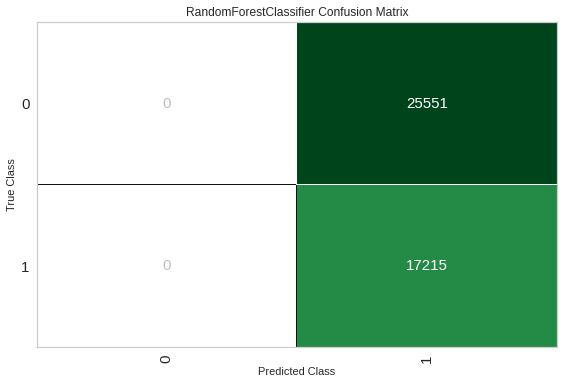

time: 780 ms


In [ ]:
plot_model(tuned_rf, plot = 'confusion_matrix')

The cost of predicting everything as positive is \\$255510 for this dataset, or about \\$5.97 per prediction. This is in line with our expected cost of about \\$6 for predicting only only positives.

In [ ]:
print("the cost assiciate to the tuned model is ${}".format(cost(0,25551))) #cost(FN, FP):

the cost assiciate to the tuned model is $255510
time: 1.18 ms


To see if we can improve on that cost, we also optimize on F1 score. The 10-fold cross validation can be seen below. Since most metrics are fairly close over the 10 iterations, this is evidence against overfitting, which is a good thing. 

In [ ]:
tuned_rf_f1 = tune_model(rf, optimize = 'f1') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7859,0.8478,0.7512,0.7250,0.7379,0.5570,0.5572
1,0.7839,0.8490,0.7682,0.7147,0.7405,0.5558,0.5569
2,0.7762,0.8403,0.7450,0.7111,0.7276,0.5379,0.5383
3,0.7793,0.8417,0.7434,0.7169,0.7299,0.5435,0.5438
4,0.7793,0.8403,0.7372,0.7196,0.7283,0.5426,0.5427
5,0.7782,0.8426,0.7517,0.7117,0.7311,0.5427,0.5433
6,0.7831,0.8444,0.7622,0.7157,0.7382,0.5534,0.5542
7,0.7742,0.8438,0.7734,0.6970,0.7332,0.5384,0.5406
8,0.7766,0.8428,0.7399,0.7137,0.7266,0.5379,0.5381
9,0.7798,0.8495,0.7654,0.7089,0.7361,0.5477,0.5489


time: 21min 34s


You can see the final specifications of our random forest model tuned using F1 score below.

Please see a greater explanation of the specifications here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
print(tuned_rf_f1)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
time: 1.44 ms


Below is our confusion matrix for the random forest model tuned using F1 score. It is clear that our predictions are much more balanced in this iteration, as this model actually predicted "False" values. 

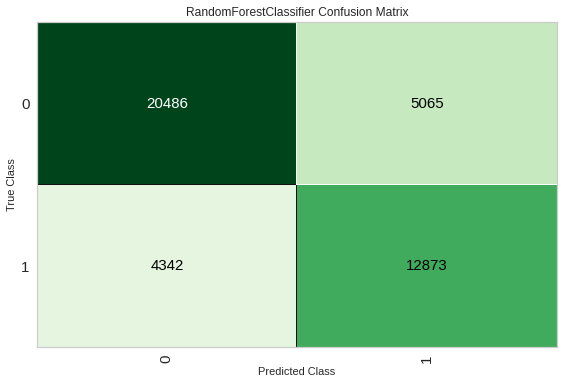

time: 1.08 s


In [ ]:
plot_model(tuned_rf_f1, plot = 'confusion_matrix')

Despite much higher accuracy, F1 and AUC than the model that was optimized using recall, the model optimized using F1 score has a much higher cost: \\$2221650. This comes out to a cost per prediction of about \\$51.95.

In [ ]:
print("the cost assiciate to the tuned model is ${}".format(cost(4342,5065))) #cost(FN, FP):

the cost assiciate to the tuned model is $2221650
time: 1.11 ms


#### 2. Cat boost

Here, we create catboost models.

In [31]:
%%time
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9338,0.9805,0.9023,0.9305,0.9162,0.8615,0.8617
1,0.9343,0.9806,0.9071,0.9275,0.9172,0.8627,0.8628
2,0.9348,0.9802,0.9086,0.9274,0.9179,0.8638,0.8639
3,0.9350,0.9808,0.9101,0.9265,0.9182,0.8642,0.8643
4,0.9340,0.9800,0.9051,0.9285,0.9166,0.8620,0.8622
5,0.9323,0.9802,0.9081,0.9219,0.9149,0.8587,0.8587
6,0.9347,0.9814,0.9138,0.9226,0.9182,0.8638,0.8638
7,0.9330,0.9789,0.9051,0.9261,0.9155,0.8599,0.8601
8,0.9357,0.9803,0.9088,0.9292,0.9189,0.8656,0.8657
9,0.9387,0.9814,0.9196,0.9270,0.9233,0.8722,0.8722


CPU times: user 2min 24s, sys: 4.2 s, total: 2min 29s
Wall time: 3min 43s


Here, we tune our catboost models. We optimize our catboost model on recall, as we are interested in minimizing false negatives. 

In [32]:
%%time
tuned_catBoost = tune_model(catboost, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9077,0.9672,0.8541,0.9103,0.8813,0.8059,0.8070
1,0.9083,0.9669,0.8599,0.9068,0.8827,0.8075,0.8083
2,0.9066,0.9667,0.8586,0.9038,0.8806,0.8040,0.8047
3,0.9089,0.9688,0.8589,0.9090,0.8832,0.8087,0.8095
4,0.9082,0.9669,0.8559,0.9100,0.8821,0.8071,0.8081
5,0.9062,0.9661,0.8656,0.8970,0.8810,0.8036,0.8040
6,0.9115,0.9679,0.8711,0.9048,0.8876,0.8147,0.8151
7,0.9061,0.9648,0.8604,0.9011,0.8803,0.8031,0.8037
8,0.9065,0.9663,0.8621,0.9006,0.8809,0.8040,0.8045
9,0.9097,0.9685,0.8644,0.9062,0.8848,0.8106,0.8112


CPU times: user 47.9 s, sys: 1.36 s, total: 49.3 s
Wall time: 6min 47s


Below, you can see a confusion matrix for the tuned CatBoost model. 

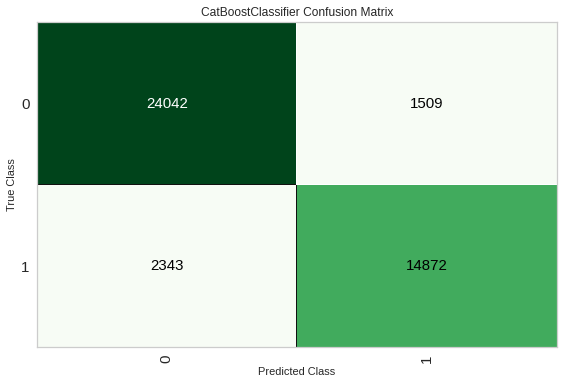

In [33]:
plot_model(tuned_catBoost, plot = 'confusion_matrix')

The cost of the catboost model fit using F1 is \\$1186590, which is less both of the random forest models. The cost per prediction of this model is \\$27.75.

In [35]:
print("the cost assiciate to the tuned model is ${}".format(cost(2343,1509))) #cost(FN, FP):


the cost assiciate to the tuned model is $1186590


Like our random forest model, we decided to fit the catboost model by optimizing using F1 score. Below, we create the model again. 

In [ ]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9341,0.9800,0.9031,0.9305,0.9166,0.8621,0.8624
1,0.9338,0.9803,0.9063,0.9269,0.9165,0.8616,0.8618
2,0.9377,0.9807,0.9111,0.9320,0.9214,0.8698,0.8699
3,0.9371,0.9808,0.9123,0.9295,0.9208,0.8686,0.8687
4,0.9354,0.9806,0.9093,0.9281,0.9186,0.8650,0.8651
5,0.9331,0.9799,0.9096,0.9225,0.9160,0.8603,0.8604
6,0.9359,0.9815,0.9166,0.9230,0.9198,0.8664,0.8664
7,0.9335,0.9788,0.9046,0.9277,0.9160,0.8609,0.8611
8,0.9354,0.9806,0.9096,0.9279,0.9186,0.8650,0.8651
9,0.9381,0.9808,0.9193,0.9258,0.9225,0.8709,0.8710


time: 5min 14s


Here, we tune the model using F1 score. There is not evidence of overfitting. 

In [ ]:
tuned_catboost_f1 = tune_model(catboost, optimize = 'f1') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9070,0.9669,0.8541,0.9086,0.8805,0.8045,0.8056
1,0.9087,0.9670,0.8631,0.9049,0.8835,0.8085,0.8092
2,0.9063,0.9666,0.8591,0.9027,0.8804,0.8034,0.8041
3,0.9084,0.9685,0.8596,0.9072,0.8828,0.8077,0.8085
4,0.9071,0.9670,0.8539,0.9090,0.8806,0.8047,0.8058
5,0.9068,0.9659,0.8634,0.9002,0.8814,0.8047,0.8052
6,0.9089,0.9676,0.8686,0.9008,0.8844,0.8093,0.8096
7,0.9062,0.9649,0.8586,0.9028,0.8802,0.8032,0.8039
8,0.9079,0.9668,0.8601,0.9056,0.8823,0.8067,0.8074
9,0.9096,0.9687,0.8631,0.9071,0.8845,0.8103,0.8110


time: 4min 15s


Below, you can see the confusion matrix of the catboost model. 

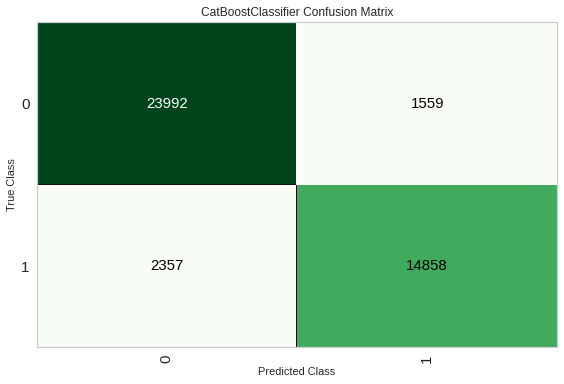

time: 493 ms


In [ ]:
plot_model(tuned_catboost_f1, plot = 'confusion_matrix')

The cost of the catboost model fit using F1 is \\$1194090, which is less than the random forest model but more than the catboost model fit using recall. The cost per prediction of this model is \\$27.92. Both CatBoost models give fairly similar cost per predictions.

In [ ]:
print("the cost assiciate to the tuned model is ${}".format(cost(2357,1559))) #cost(FN, FP):


the cost assiciate to the tuned model is $1194090
time: 972 µs


### 3. Logistic Regression

Here, we create our linear regression model.

In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6988,0.7425,0.5417,0.6494,0.5907,0.3554,0.3591
1,0.7056,0.7518,0.5669,0.6534,0.6071,0.3736,0.3760
2,0.6965,0.7379,0.5415,0.6450,0.5887,0.3511,0.3545
3,0.7038,0.7453,0.5433,0.6585,0.5954,0.3651,0.3693
4,0.6930,0.7372,0.5346,0.6405,0.5828,0.3430,0.3465
5,0.6953,0.7279,0.5376,0.6439,0.5860,0.3480,0.3515
6,0.7053,0.7573,0.5593,0.6554,0.6036,0.3714,0.3743
7,0.6924,0.7415,0.5481,0.6352,0.5884,0.3450,0.3474
8,0.6951,0.7396,0.5463,0.6408,0.5898,0.3497,0.3525
9,0.6977,0.7425,0.5533,0.6433,0.5950,0.3560,0.3586


time: 13.7 s


Again, we tune our model using auto gridsearch, first optimizing on recall. 

In [ ]:
tuned_lr = tune_model(lr, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7014,0.7528,0.6801,0.6158,0.6463,0.3890,0.3905
1,0.7033,0.7560,0.6951,0.6153,0.6528,0.3954,0.3976
2,0.7042,0.7522,0.6878,0.6180,0.6511,0.3956,0.3973
3,0.7048,0.7522,0.6787,0.6207,0.6484,0.3949,0.3960
4,0.6928,0.7380,0.6538,0.6090,0.6306,0.3682,0.3688
5,0.7001,0.7498,0.6850,0.6129,0.6469,0.3876,0.3894
6,0.7066,0.7615,0.6907,0.6207,0.6538,0.4005,0.4022
7,0.7011,0.7534,0.6925,0.6129,0.6502,0.3910,0.3933
8,0.7006,0.7485,0.6850,0.6137,0.6474,0.3887,0.3904
9,0.6990,0.7486,0.6862,0.6113,0.6466,0.3860,0.3880


time: 50 s


Below are the specifications of our final linear regression model that was tuned on recall. 

Please see a greater explanation of the specifications here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
print(tuned_lr)

LogisticRegression(C=0.024, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
time: 1.53 ms


Below, you can see the confusion matrix of our linear regression model. 

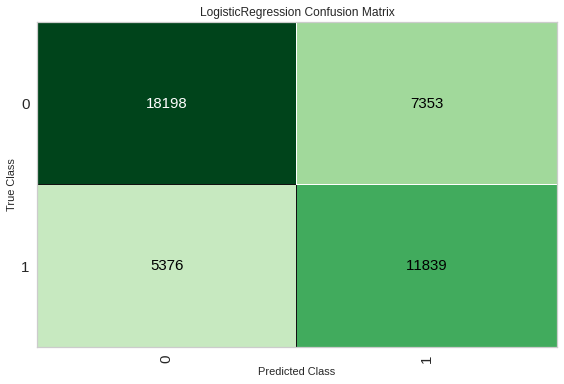

time: 562 ms


In [ ]:
plot_model(tuned_lr, plot = 'confusion_matrix')

The cost of the linear regression model fit using recall is \\$2761530, which is more than every model that we have tried so far. The cost per prediction of this model is \\$64.57.

In [ ]:
print("the cost assiciate to the tuned model is ${}".format(cost(5376,7353))) #cost(FN, FP):

the cost assiciate to the tuned model is $2761530
time: 995 µs


Similar to our random forest and CatBoost model, we also optimize our linear regression model using F1 score. 

In [ ]:
tuned_lr_f1 = tune_model(lr, optimize = 'f1') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7014,0.7528,0.6801,0.6158,0.6463,0.3890,0.3905
1,0.7033,0.7560,0.6951,0.6153,0.6528,0.3954,0.3976
2,0.7042,0.7522,0.6878,0.6180,0.6511,0.3956,0.3973
3,0.7048,0.7522,0.6787,0.6207,0.6484,0.3949,0.3960
4,0.6928,0.7380,0.6538,0.6090,0.6306,0.3682,0.3688
5,0.7001,0.7498,0.6850,0.6129,0.6469,0.3876,0.3894
6,0.7066,0.7615,0.6907,0.6207,0.6538,0.4005,0.4022
7,0.7011,0.7534,0.6925,0.6129,0.6502,0.3910,0.3933
8,0.7006,0.7485,0.6850,0.6137,0.6474,0.3887,0.3904
9,0.6990,0.7486,0.6862,0.6113,0.6466,0.3860,0.3880


time: 49.3 s


Below, you can see the final specifications of our linear regression model fit using F1 score. 

Please see a greater explanation of the specifications here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
print(tuned_lr_f1)

LogisticRegression(C=0.024, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
time: 1.39 ms


Below, we plot our confusion matrix for our linear regression model fit using F1 score. 

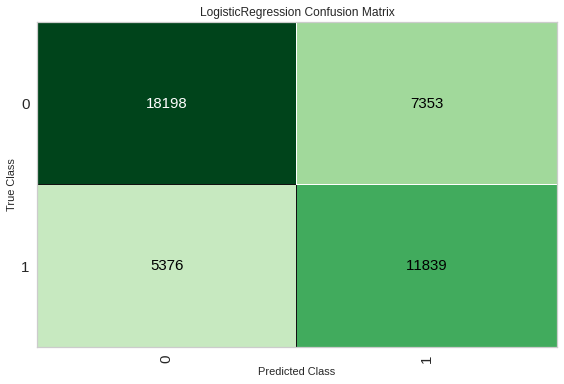

time: 558 ms


In [ ]:
plot_model(tuned_lr_f1, plot = 'confusion_matrix')

The cost of the linear regression model fit using recall is \\$2761530, which is more than every model that we have tried so far. The cost per prediction of this model is \\$64.57. Given that the models gave the same performance, it looks like F1 score and Recall result in the same linear regression model. 

In [ ]:
## print cost value
print("the cost assiciate to the tuned model is ${}".format(cost(5376,7353))) #cost(FN, FP):


the cost assiciate to the tuned model is $2761530
time: 1.09 ms


### Comparing Fine Tuned Models
Our best performing model in terms of Cost per Prediction is the Random Forest model that predicted that everything was "True", while our second best model was the CatBoost model that was tuned with recall. The CatBoost model tuned with recall had a fairly similar cost per prediction as the CatBoost model tuned with F1, and the linear regression model tuned with Recall gave the exact same model as the linear regression model tuned with F1. We could not find a model that gave a better cost per prediction than simply classifying everything as "True".

|Model | Tuning |  Cost per Prediction | 
|:--------|:-------- |:-------- |
|Random Forest | Recall | \\$5.97|
|Random Forest | F1 | \\$51.95 |
|CatBoost | Recall | \\$27.75 |
|CatBoost | F1 | \\$27.92 |
|Linear Regression | Recall | \\$64.57 |
|Linear Regression | F1 | \\$64.57 |


## Model Interpretability & Explainability

In our final comparison, we will be comparing the CatBoost model that was tuned using recall, and the first random forest model that predicted all values as "True". These were our best performing models in terms of cost per prediction.

### CatBoost

Below we have a plot of feature importances for the variables in our model. Catboost models are faily complex, so we use SHAP value to calculate feature importance. A large negative SHAP value will pull the model more toward predicting "False", while a large positive SHAP value will pull the model more toward predicting "True". For example, variable x23 is fairly important. A high value in x23 will pull the model toward predicting "False", while a low value in x23 will pull the model toward predicting "True". According to SHAP, the top 5 most important variables are:   
1) x23 - higher values pull prediction toward "False"  
2) x49 - higher values pull prediction toward "True"  
3) x42 - higher values pull prediction toward "False"  
4) x28 - higher values pull prediction toward "False"  
5) x20 - higher values pull prediction toward "False"  

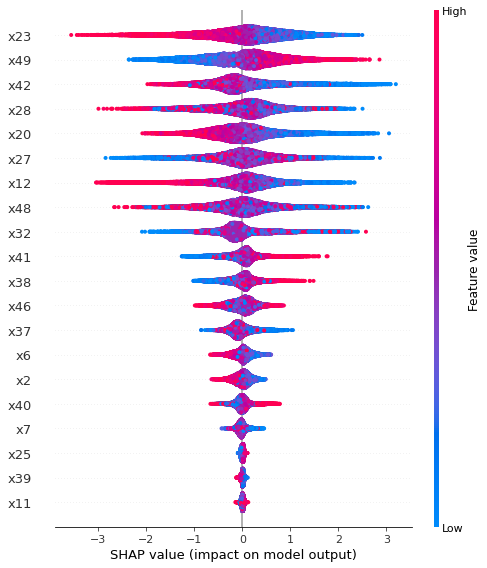

CPU times: user 54min 56s, sys: 14.7 s, total: 55min 10s
Wall time: 7min 47s


In [31]:
%%time
interpret_model(tuned_catBoost)

Below, we make predictions on the holdout set. You can see the amount of time it took to run the predictions as well. 

In [21]:
%%time
predictions = predict_model(tuned_catBoost, data = data_unseen)

CPU times: user 418 ms, sys: 36.1 ms, total: 454 ms
Wall time: 295 ms


In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

y_true = predictions['y']
y_pred = predictions['Label']
y_pred = pd.to_numeric(y_pred)

cf_matrix = confusion_matrix(y_true, y_pred)



Below, we define a function to make the confusion matrix that you will see later.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)


Here, you can see our confusion matrix of our catboost model tuned on recall for our holdout set. False Positives and False Negatives are both between 400 and 500. Our accuracy, precision, recall and F1 scores are all between .92 and .95. 

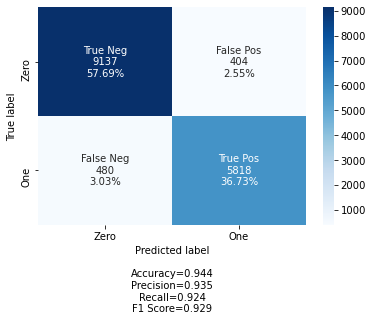

In [44]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories)

Below, we show the cost of the CatBoost model. At \\$15.41 per prediction, it is still cheaper to simply predict "True" for each prediction. 

In [16]:
print('Cost of False Positives: $' + str(404*10))
print('Cost of False Negatives: $' + str(480*500))
print('Total Cost of','15839','predictions: $',str(404*10 + 480*500))
print('Cost per prediction $', str(round((404*10 + 480*500)/15839, 2)))

Cost of False Positives: $4040
Cost of False Negatives: $240000
Total Cost of 15839 predictions: $ 244040
Cost per prediction $ 15.41


### Random Forest Tuned with Recall

Below, you can see the parameters in the random forest model that was tuned with recall. 

In [ ]:
plot_model(tuned_rf, plot = 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,balanced
criterion,gini
max_depth,9
max_features,1.0
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.1
min_impurity_split,None


time: 290 ms


Below is our AUC plot for our Random Forest Classifier. An AUC above the line y=x is considered to be a model that does better than just guessing randomly. Our AUC is below the line y=x due to the fact that we are only guessing "True" with this model. Despite the low cost associated, the AUC is pretty poor. 

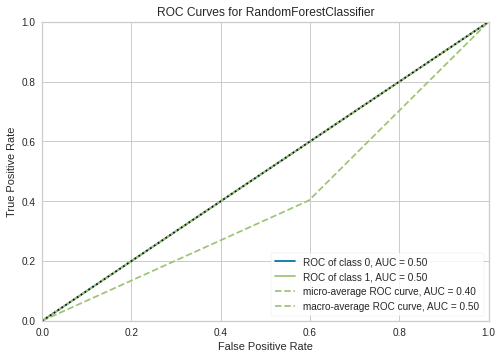

time: 915 ms


In [ ]:
plot_model(tuned_rf, plot = 'auc')

Below is our feature importance plot. It looks fairly strange: No variable has any importance. Again, this is due to us predicting "True" for every single prediction. No variable has any discriminatory power, so no variable has any importance. 

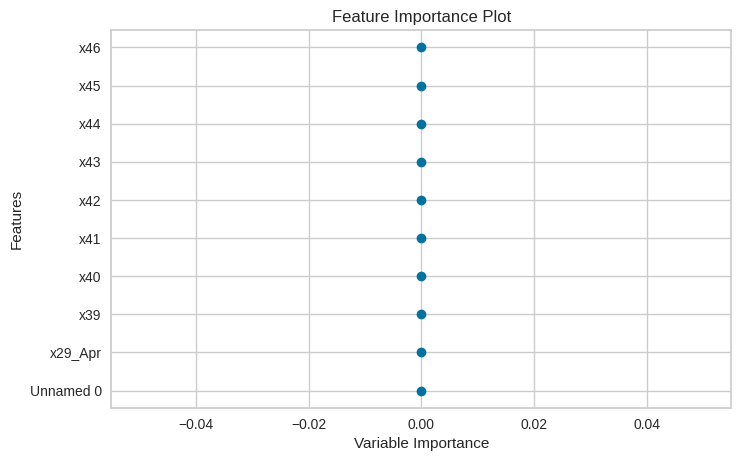

time: 528 ms


In [ ]:
plot_model(tuned_rf, plot='feature')

As we know that the percentage of negatives in the dataset is about 60%, we know that the cost of this model is going to be about \\$6. This is significantly less than the cost of the CatBoost model. 

## Conclusion

We were given a dataset and asked to minimize the cost function \\$10 for false positives, \\$500 for false negatives, and \\$0 for both true positives and true negatives. After fitting 6 models, including the top model as identified by Pycaret, we could not beat our goal of less than \\$6 per prediction. We were able to determine that the top 5 variables for classifying a data point as "True" or "False" were x23, x49, x42, x28 and x20. 

Unfortunately, due to the fact that alse negatives are 50 times more expensive than false positives, we were not able to create a model that performed better than simply predicting every data point as "True". We propose that you classify every one of these data points as "True" and deal with the cost of false positives rather than risking the cost of false negatives. 

We recommend testing state of the art neural network models. These were too complex for the scope of this case study, but might be able to uncover trends in the data that could be used to classify some data points as "False" but are still able to avoid false negatives as much as possible. 